<a href="https://colab.research.google.com/github/Harmeet-Kaur01/SVM/blob/main/SVM_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv("cell_samples.csv")

In [ ]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<Axes: xlabel='Clump', ylabel='UnifSize'>

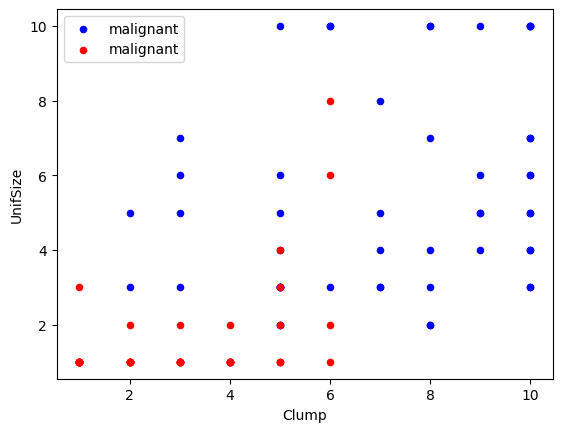

In [ ]:
import matplotlib.pyplot as plt

ax = df[df['Class']==4][0:50].plot(kind = 'scatter',x = 'Clump', y = 'UnifSize', color = 'blue', label = 'malignant')
df[df['Class']==2][0:50].plot(kind = 'scatter',x = 'Clump', y = 'UnifSize', color = 'red', label = 'malignant', ax= ax)

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

# Filter rows where 'BareNuc' is numeric
df = df[pd.notnull(df['BareNuc'])]
df['BareNuc'] = df['BareNuc'].astype('int')

<ipython-input-71-b954fa521940>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


In [ ]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [ ]:
fdf = df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x= np.asarray(fdf)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
y = np.array(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn import svm
c = svm.SVC(kernel = 'rbf')
c.fit(x_train,y_train)

SVC()

In [ ]:
p = c.predict(x_test)
p[0:5]

array([2, 4, 2, 2, 2])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,p, average = 'weighted')

0.9708029197080292